---

## Practice: Coin Removal

Given image of coins on a table, detect the coins and remove them.

- Detect circles on the image using `cv2.HoughCircles()` method.
- Fill the circles with the same color as the surrounding background using `cv2.circle()` method.  
(You can adjust the various parameters to get better results.)

Here's the input and a sample output:

<img src="../images/coins_results.jpg" width="600">

In [1]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import cv2

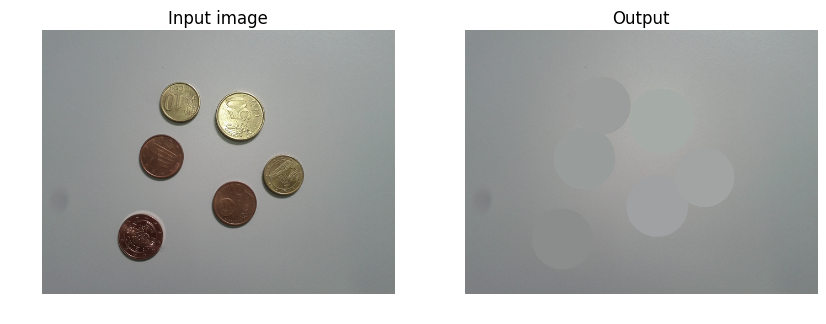

In [2]:
# Read Input
img = cv2.imread('../images/coins.png', cv2.IMREAD_COLOR)
# ============ YOUR CODE HERE ============
# Detect circles on the image
img_gray = cv2.cvtColor(img, cv2.COLOR_BGRA2GRAY)
img_gray = cv2.medianBlur(img_gray, 9)
circles = cv2.HoughCircles(img_gray, cv2.HOUGH_GRADIENT, 1, 50,
                            param1=100, param2=30, minRadius=0, maxRadius=0)
circles = np.uint16(np.around(circles))
# ========================================

output = np.copy(img)
# ============ YOUR CODE HERE ============
# Remove coins in the output image
for cx, cy, r in circles[0]:
    color = img[cy-r, cx-r].tolist()
    color.reverse()
    cv2.circle(output, (cx, cy), r+15, color, -1)
# ========================================

# Plot results
plt.figure(figsize=(10, 4));
plt.subplot(1, 2, 1); plt.title('Input image'); plt.axis('off');
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB));
plt.subplot(1, 2, 2); plt.title('Output'); plt.axis('off');
plt.imshow(cv2.cvtColor(output, cv2.COLOR_BGR2RGB));

### Coin Removal using `cv2.inpaint()`

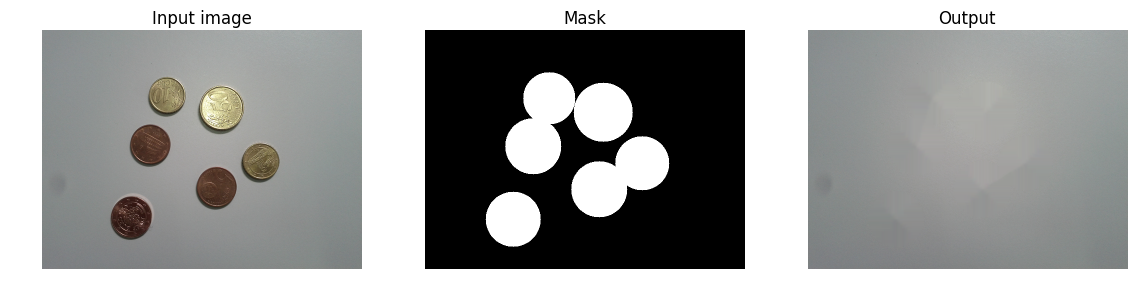

In [3]:
# Read Input
img = cv2.imread('../images/coins.png', cv2.IMREAD_COLOR)
# ============ YOUR CODE HERE ============
# Detect circles on the image
img_gray = cv2.cvtColor(img, cv2.COLOR_BGRA2GRAY)
img_gray = cv2.medianBlur(img_gray, 9)
circles = cv2.HoughCircles(img_gray, cv2.HOUGH_GRADIENT, 1, 50,
                            param1=100, param2=30, minRadius=0, maxRadius=0)
circles = np.uint16(np.around(circles))
# ========================================

# ============ YOUR CODE HERE ============
# Remove coins in the output image
mask = np.zeros(img_gray.shape, dtype=np.uint8)
for cx, cy, r in circles[0]:
    cv2.circle(mask, (cx, cy), r+15, 255, -1)
    
output = cv2.inpaint(img, mask, 10, cv2.INPAINT_NS)
# ========================================

# Plot results
plt.figure(figsize=(14, 4));
plt.subplot(1, 3, 1); plt.title('Input image'); plt.axis('off');
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB));
plt.subplot(1, 3, 2); plt.title('Mask'); plt.axis('off');
plt.imshow(mask, cmap='gray');
plt.subplot(1, 3, 3); plt.title('Output'); plt.axis('off');
plt.imshow(cv2.cvtColor(output, cv2.COLOR_BGR2RGB));